# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nathan Daud
- **Email:** nathandaud@student.ub.ac.id
- **ID Dicoding:** nathan_daud_UIb1

## Menentukan Pertanyaan Bisnis

- What is the effect of hours on the use of bike sharing services?
- How does weather affect the usage of bike sharing services?
- How do working days affact the usage of bike sharing services?

## Import Semua Packages/Library yang Digunakan

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')

print(pd.__version__)
print(np.__version__)
print(sns.__version__)

2.1.1
1.26.1
0.13.0


## Data Wrangling

### Gathering Data

In [10]:
day = pd.read_csv("C:/UB/MBKM/BANGKIT/Penalaksanaan/Belajar Analisis Data dengan Python/Proyek/day.csv")
hour = pd.read_csv("C:/UB/MBKM/BANGKIT/Penalaksanaan/Belajar Analisis Data dengan Python/Proyek/hour.csv")
print(day)
print(hour)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

In [11]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [13]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
print("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [18]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [19]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [21]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [23]:
day['check'] = day['casual'] + day['registered'] - day['cnt']
mismatch_count = (day['check'] != 0).sum()
print(f"Number of rows where 'casual' + 'registered' does not equal 'cnt': {mismatch_count}")

Number of rows where 'casual' + 'registered' does not equal 'cnt': 0


In [25]:
hour['check'] = hour['casual'] + hour['registered'] - hour['cnt']
mismatch_count = (hour['check'] != 0).sum()
print(f"Number of rows where 'casual' + 'registered' does not equal 'cnt': {mismatch_count}")

Number of rows where 'casual' + 'registered' does not equal 'cnt': 0


In [30]:
# Convert the 'dteday' column to datetime
day['dteday'] = pd.to_datetime(day['dteday'])

# Create a complete date range between the min and max dates in your dataset
date_range = pd.date_range(start=day['dteday'].min(), end=day['dteday'].max())

# Check which dates from the date range are not in the 'dteday' column
missing_dates = date_range[~date_range.isin(day['dteday'])]

# Print the missing dates
print("Missing dates:")
print(missing_dates)

Missing dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [32]:
# Convert the 'dteday' column to datetime
hour['dteday'] = pd.to_datetime(hour['dteday'])

# Create a complete date range between the min and max dates in your dataset
date_range = pd.date_range(start=hour['dteday'].min(), end=hour['dteday'].max())

# Check which dates from the date range are not in the 'dteday' column
missing_dates = date_range[~date_range.isin(hour['dteday'])]

# Print the missing dates
print("Missing dates:")
print(missing_dates)

Missing dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


### Cleaning Data

In [44]:
day.drop(columns=['instant'], inplace=True)
day.drop(columns=['check'], inplace=True)

In [45]:
hour.drop(columns=['instant'], inplace=True)
hour.drop(columns=['check'], inplace=True)

In [176]:
day.info()
hour.info()

day.to_csv("day_clean.csv", index=False)
hour.to_csv("hour_clean.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
<class '

## Exploratory Data Analysis (EDA)

### Explore Data

In [47]:
day.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


array([[<Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

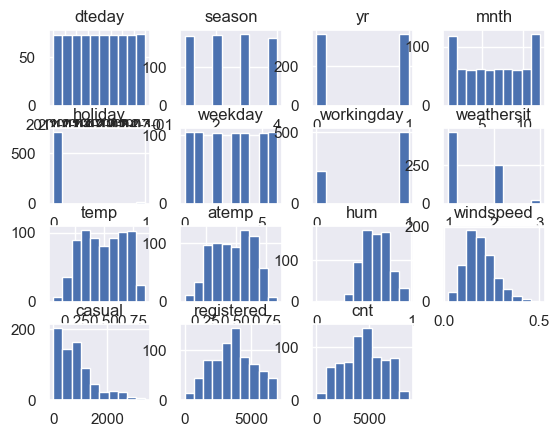

In [48]:
day.hist()

In [49]:
hour.hist

<bound method hist_frame of           dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0     2011-01-01       1   0     1   0        0        6           0   
1     2011-01-01       1   0     1   1        0        6           0   
2     2011-01-01       1   0     1   2        0        6           0   
3     2011-01-01       1   0     1   3        0        6           0   
4     2011-01-01       1   0     1   4        0        6           0   
...          ...     ...  ..   ...  ..      ...      ...         ...   
17374 2012-12-31       1   1    12  19        0        1           1   
17375 2012-12-31       1   1    12  20        0        1           1   
17376 2012-12-31       1   1    12  21        0        1           1   
17377 2012-12-31       1   1    12  22        0        1           1   
17378 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0               1  0.24  0.2879

In [50]:
day.corr()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [51]:
hour.corr()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136074,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


### Explore workday and user

In [110]:
sum_work_day = day.groupby(by="workingday").agg({
    'casual': ['sum','mean','min','max'],
    'registered': ['sum','mean','min','max']
}).reset_index()

sum_work_day

workingday  casual                        registered                        
                 sum         mean min   max        sum         mean  min   max
0          0  316732  1371.134199  54  3410     683537  2959.034632  451  5966
1          1  303285   606.570000   2  2469    1989125  3978.250000   20  6946

In [111]:
sum_work_hour = hour.groupby(by="workingday").agg({
    'casual': ['sum','mean','min','max'],
    'registered': ['sum','mean','min','max']
}).reset_index()

sum_work_hour

workingday  casual                     registered                     
                 sum       mean min  max        sum        mean min  max
0          0  316732  57.441422   0  367     683537  123.963910   0  601
1          1  303285  25.561315   0  264    1989125  167.646439   0  886

### Explore weather and user

In [112]:
sum_wet_day = day.groupby(by="weathersit").agg({
    'casual': ['sum','mean','min','max'],
    'registered': ['sum','mean','min','max']
}).reset_index()

sum_wet_day

weathersit  casual                       registered                        
                 sum        mean min   max        sum         mean  min   max
0          1  446346  964.030238  15  3410    1811606  3912.755940  416  6946
1          2  169776  687.352227   9  3155     827082  3348.510121  491  6844
2          3    3895  185.476190   2  1264      33974  1617.809524   20  4324

In [113]:
sum_wet_hour = hour.groupby(by="weathersit").agg({
    'casual': ['sum','mean','min','max'],
    'registered': ['sum','mean','min','max']
}).reset_index()

sum_wet_hour

weathersit  casual                     registered                     
                 sum       mean min  max        sum        mean min  max
0          1  462745  40.545431   0  367    1875428  164.323841   0  886
1          2  134481  29.595290   0  350     661471  145.570202   0  822
2          3   22783  16.055673   0  263     135548   95.523608   0  791
3          4       8   2.666667   1    6        215   71.666667  22  158

### Explore hour and user

In [114]:
sum_hr = hour.groupby(by="hr").agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

sum_hr

,hr,casual,registered
0,0,7375,31755
1,1,4709,19455
2,2,3412,12940
3,3,1893,6281
4,4,874,3554
5,5,1012,13249
6,6,3017,52115
7,7,8037,146134
8,8,15761,245240
9,9,22458,136980


## Visualization & Explanatory Analysis

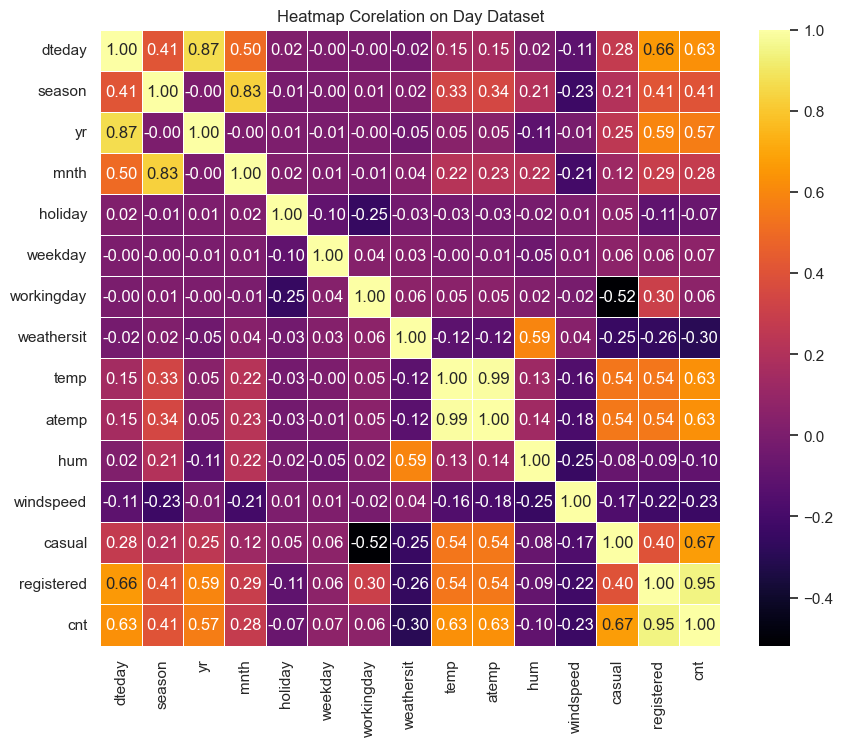

In [140]:
corr = day.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Corelation on Day Dataset')
plt.show()

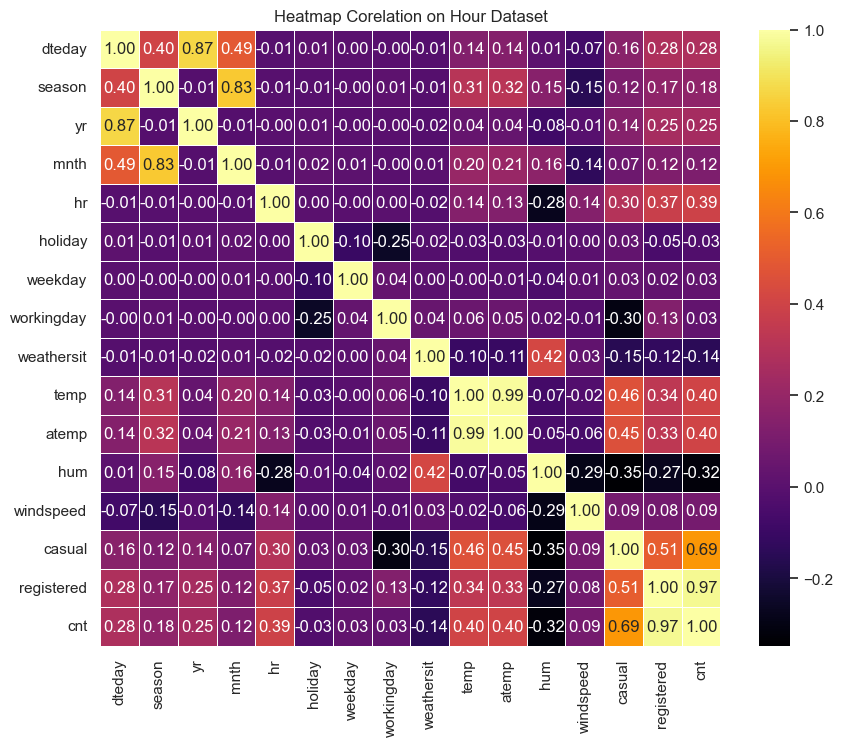

In [141]:
corr = hour.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Corelation on Hour Dataset')
plt.show()

### Pertanyaan 1:

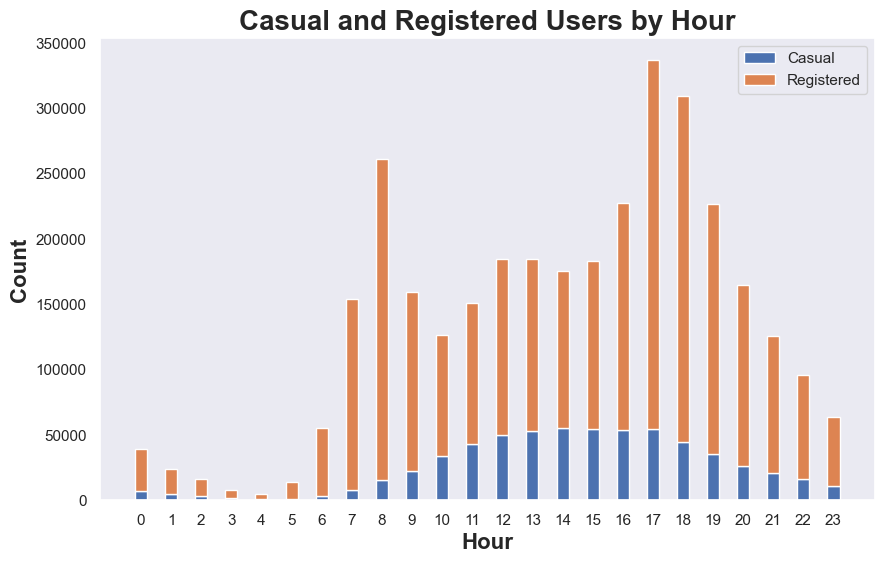

In [153]:
hours = sum_hr['hr']
casual = sum_hr['casual']
registered = sum_hr['registered']

# Lebar total bar
total_width = 0.8
# Lebar setiap bar
bar_width = total_width / 2

# Mengatur posisi setiap bar
casual_bar = hours
registered_bar = [i + bar_width for i in hours]

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(hours, casual, width=bar_width, label='Casual')
plt.bar(hours, registered, width=bar_width, label='Registered', bottom=casual)

# Menambahkan label dan judul
plt.xlabel('Hour', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Casual and Registered Users by Hour', fontsize=20, fontweight='bold')
plt.xticks(hours)
plt.legend()

plt.show()

### Pertanyaan 2:

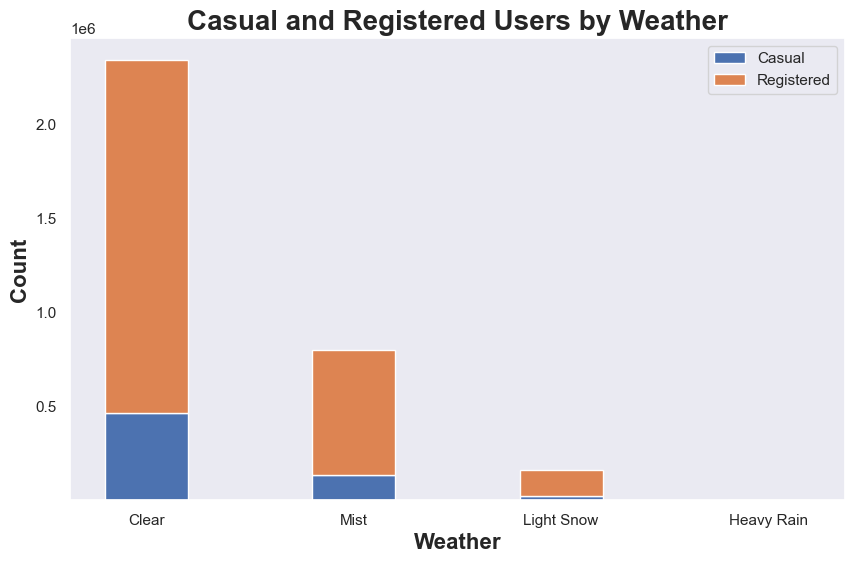

In [165]:
wet_hour = sum_wet_hour['weathersit']
casual = sum_wet_hour['casual']['sum']
registered = sum_wet_hour['registered']['sum']

total_width = 0.8
bar_width = total_width / 2
casual_bar = wet_hour
registered_bar = [i + bar_width for i in wet_hour]

weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4:'Heavy Rain'}

weather_labels = [weather_mapping[hour] for hour in wet_hour]


plt.figure(figsize=(10, 6))
plt.bar(wet_hour, casual, width=bar_width, label='Casual')
plt.bar(wet_hour, registered, width=bar_width, label='Registered', bottom=casual)


plt.xticks([i for i in wet_hour], weather_labels, ha='center')


plt.xlabel('Weather', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Casual and Registered Users by Weather', fontsize=20, fontweight='bold')
plt.legend()

plt.show()

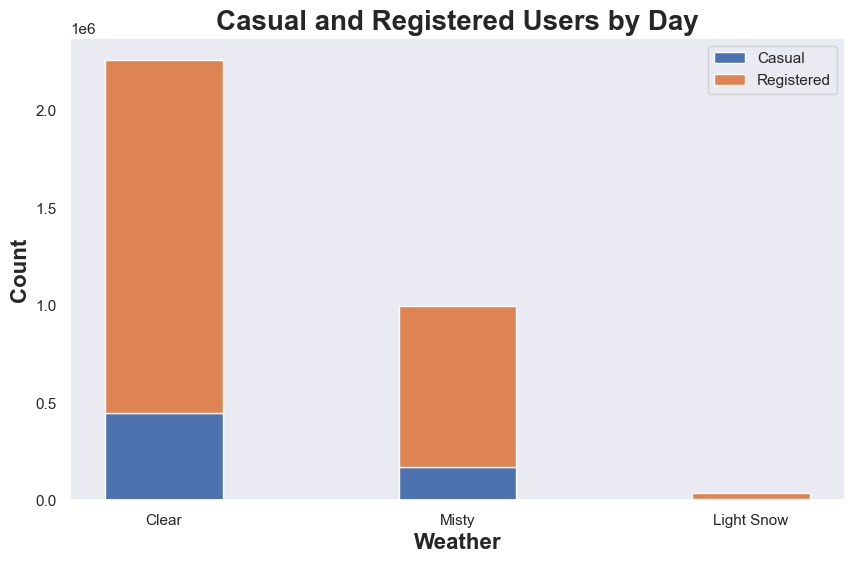

In [175]:
wet_day = sum_wet_day['weathersit']
casual = sum_wet_day['casual']['sum']
registered = sum_wet_day['registered']['sum']

total_width = 0.8

bar_width = total_width / 2

casual_bar = wet_day
registered_bar = [i + bar_width for i in wet_day]

weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Rain'}
weather_labels = [weather_mapping[weather] for weather in wet_day]

plt.figure(figsize=(10, 6))
plt.bar(wet_day, casual, width=bar_width, label='Casual')
plt.bar(wet_day, registered, width=bar_width, label='Registered', bottom=casual)


plt.xlabel('Weather', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Casual and Registered Users by Day', fontsize=20, fontweight='bold')
plt.xticks([i for i in wet_day], weather_labels, ha='center')
plt.legend()

plt.show()

### Pertanyaan 3:

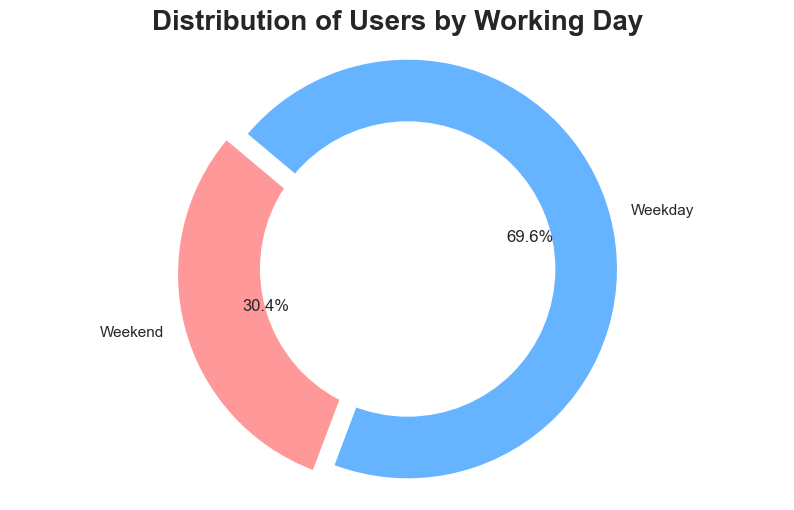

In [174]:
work_day = sum_work_day['workingday']
casual = sum_work_day['casual']['sum']
registered = sum_work_day['registered']['sum']

work_mapping = {1: 'Weekday', 0: 'Weekend'}
work_label = [work_mapping[day] for day in work_day]

# Menghitung total pengguna (casual + registered) untuk setiap kategori hari kerja
total_users = [c + r for c, r in zip(casual, registered)]

# Warna untuk setiap potongan pie
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(10, 6))
plt.pie(total_users, labels=work_label, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))

# Menambahkan lingkaran di tengah sebagai efek donat
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Users by Working Day', fontsize=20, fontweight='bold')
plt.axis('equal')  # Memastikan lingkaran menjadi lingkaran dan bukan elips
plt.show()

## Conclusion

- Conclution pertanyaan 1
Based on the analysis and visualization conducted, it is found that the 'hr' feature shows a fairly positive correlation with the usage of bike sharing services, as observed in both casual and registered users. From the visualizations, it is evident that for casual users, the usage of bike sharing services tends to increase in the morning from 6 AM to 5 PM and then gradually decrease afterward. For registered users, there is a similar trend as casual users but with more fluctuations, albeit the usage is significantly higher compared to casual users.

- Conclution pertanyaan 2
From the weather perspective, the variable "weathersit" shows a negative correlation (corr coefficient = -0.30) with the usage of bike sharing services. The characteristics of "weathersit" indicate that lower values correspond to clearer/more conducive weather conditions. Based on the visualization results, it is also observed that the usage of bike sharing services increases significantly during clear weather (weathersit = 1) and decreases drastically during rainy, snowy, and stormy conditions.

- Conclution pertanyaan 3
When viewed from the perspective of the day condition (whether it's a working day or a holiday), there is a negative correlation with casual users (corr coefficient = -0.52) and a positive correlation with registered users (corr coefficient = 0.30). A working day is denoted as 1 and a holiday is denoted as 0, thus it is found that on working days, casual users decrease while registered users increase. Conversely, on holidays, casual users increase while registered users decrease. However, the influence of these two variables makes the correlation between working days and total users not very significant (corr coefficient 0.06). Based on the visualization, it is found that during working days, the demand for bike sharing services is higher with a percentage of 69.6%. This value surpasses the demand for bike sharing services on weekends, which only reaches 30.4%.
